**Author:** Peter J. Bevan

**Date:** 15/12/23

This is a POC that calculates the normalised Levenshtein distance between prompted text and the text present in the generated image (as recognised by OCR).

To create a metric, we could create a dataset of prompts, each instructing to include some text in the image. We would also provide a column for ground truth generated text which contains only the instructed text. For each model to be evaluated, each of the prompts can be used to generate one or more images. The below script is then run on the generated images, comparing the target text with the actual text, outputting a score. This score is then averaged to give a benchmark score.

The dataset of prompts can be generated with by providing a template to an LLM and having it generate prompts.

**Note**: this is a distance metric, so 0 means the text is identical. We can also convert to a similarity with *1-distance*.

Currently I don't think there are any metrics that directly measure the text output of text-img generative models. Since this metric solely looks at text within the generated images and not image quality as a whole, this metric should be used alongside other benchmarks such as those in https://karine-h.github.io/T2I-CompBench/.

In [ ]:
!pip install paddlepaddle paddleocr Levenshtein --quiet

In [ ]:
from PIL import Image
from paddleocr import PaddleOCR
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import Levenshtein

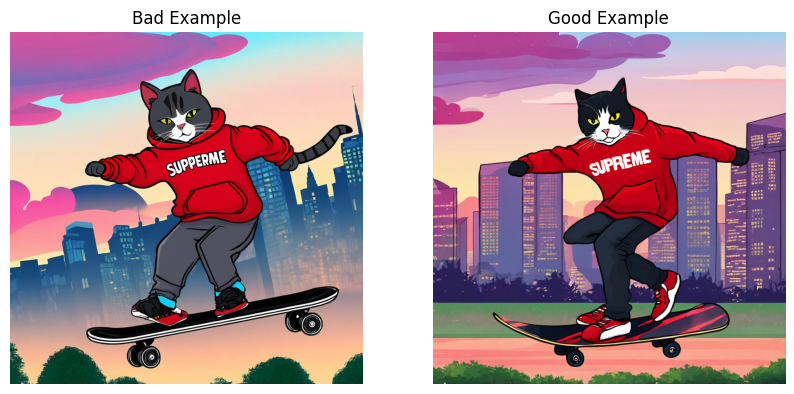

In [ ]:
prompt = "a cat skateboarding in a park. the cat is wearing a red hoodie that says 'SUPREME' and has a black baseball cap on. it is dusk in the cityscape background."
target_txt = 'SUPREME'
generated_image_path_bad = r'/content/supperme.png'
generated_image_path_good = r'/content/supreme.png'

img1 = mpimg.imread(generated_image_path_bad)
img2 = mpimg.imread(generated_image_path_good)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First image
ax1.imshow(img1)
ax1.set_title('Bad Example')
ax1.axis('off')

# Second image
ax2.imshow(img2)
ax2.set_title('Good Example')
ax2.axis('off')

plt.show()

In [ ]:
def calculate_text_distance(generated_image_path, target_txt):
  ocr = PaddleOCR(use_gpu=True, lang='en')

  result = ocr.ocr(generated_image_path, cls=True)
  for line in result:
      print(line)

  generated_txt = result[0][0][-1][0]
  print(f"Target text: {target_txt}\nGenerated text: {generated_txt}")
  # Calculate the Levenshtein distance
  normalised_levenshtein_distance = Levenshtein.distance(target_txt, generated_txt) / max(len(target_txt), len(generated_txt))
  print(f"Normalised Levenshtein distance: {normalised_levenshtein_distance}")

  return normalised_levenshtein_distance

**Calculate for bad example**

In [ ]:
score_bad = calculate_text_distance(generated_image_path_bad, target_txt)

[2023/12/15 10:15:01] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

**Calculate for good example**

In [ ]:
score_good = calculate_text_distance(generated_image_path_good, target_txt)

[2023/12/15 10:15:18] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='